**Numerical Simulation of Laminar Flow in a Vertical 2D Channel**

**Introduction:**
This numerical experiment aims to simulate the laminar flow of a fluid between two parallel lines, representing a simplified vertical 2D channel. The primary focus is on understanding the basic dynamics of fluid flow in a confined space and observing the effects of viscosity and boundary conditions on the flow pattern. This experiment is educational in nature and serves as an introduction to fluid dynamics and numerical simulation techniques.

**Methodology:**
1. **Simulation Setup**: A grid representing a vertical channel is defined, with the top and bottom boundaries acting as the inlet and outlet, and the left and right sides as channel walls.

2. **Boundary Conditions**:
   - **Inlet and Outlet (Top and Bottom Boundaries)**: Set to a constant velocity
   - **Walls (Left and Right Boundaries)**: Set to a zero velocity to represent the no-slip condition typical in fluid dynamics, where the fluid at the boundary has the same velocity as the boundary itself.

3. **Numerical Method**: The Navier-Stokes equations, specifically the diffusion term, are simplified and solved using a finite difference method. The Courant-Friedrichs-Lewy (CFL) condition is applied to determine an appropriate time step, ensuring numerical stability in the simulation.

4. **Simulation Parameters**: The simulation uses a predefined kinematic viscosity, grid size, and number of time steps to evolve the velocity field over time.

**Results**:
The resulting visualization is a contour plot showing the velocity distribution in the channel. Higher velocities are observed at the inlet and outlet, with velocity decreasing towards the center due to viscous diffusion. The no-slip condition at the walls is evident, with zero velocity at these boundaries.

**Conclusion**:
This experiment provides a fundamental insight into the behavior of laminar flow in a confined space and illustrates the impact of viscosity and boundary conditions on fluid flow. While the model is highly simplified and excludes factors like turbulence and varying pressure, it serves as a foundational tool for understanding basic concepts in fluid dynamics and the application of numerical methods in simulating physical phenomena.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [20]:
def cfl_condition(dx, dy, nu):
    """
    Applies the CFL condition for diffusion to determine the appropriate time step.
    
    Parameters:
    dx, dy (float): Space step in x and y direction
    nu (float): Kinematic viscosity

    Returns:
    float: Time step (dt) satisfying the CFL condition
    """
    # CFL condition for diffusion
    dt = min(dx**2, dy**2) / (4 * nu)
    return dt


def solve_flow(U, nt, dt, dx, dy, nu, Ux0=0, Ux1=0, Uy0=1, Uy1=1):
    """
    Solves the 2D flow laminar flow using a simple finite difference method.

    Parameters:
    U (2D array): Velocity field
    nx, ny (int): Number of grid points in x and y direction
    nt (int): Number of timesteps
    dt (float): Time step
    nu (float): Kinematic viscosity
    """
    for n in range(nt):
        Un = U.copy()
        # Update the velocity field based on the finite difference method
        U[1:-1, 1:-1] = (Un[1:-1, 1:-1] +
                         nu * dt / dx**2 * (Un[1:-1, 2:] - 2 * Un[1:-1, 1:-1] + Un[1:-1, 0:-2]) +
                         nu * dt / dy**2 * (Un[2:, 1:-1] - 2 * Un[1:-1, 1:-1] + Un[0:-2, 1:-1]))
        
        # Boundary conditions: flow between two parallel lines
        U[:, 0] = Ux0  # Left boundary
        U[:, -1] = Ux1  # Right boundary
        U[0, :] = Uy0  # Top boundary (inlet)
        # U[-1, :] = Uy1  # Bottom boundary (outlet)

    return U

In [29]:
# Simulation parameters
nx, ny = 41, 41  # Grid size
nt = 2500  # Number of timesteps
dx = 2 / (nx - 1)  # Distance between grid points in x
dy = 2 / (ny - 1)  # Distance between grid points in y
nu = 0.05  # Kinematic viscosity
dt = cfl_condition(dx, dy, nu)

# Initial conditions: stationary fluid
U = np.zeros((ny, nx))

# Boundary conditions
Ux0 = 0
Ux1 = 0
Uy0 = 5
Uy1 = 2
U[0, :] = Uy0  # Top boundary (inlet)
U[-1, :] = Uy1  # Bottom boundary (outlet)

# Solve the flow
U = solve_flow(U, nt, dt, dx, dy, nu, Ux0, Ux1, Uy0, Uy1)


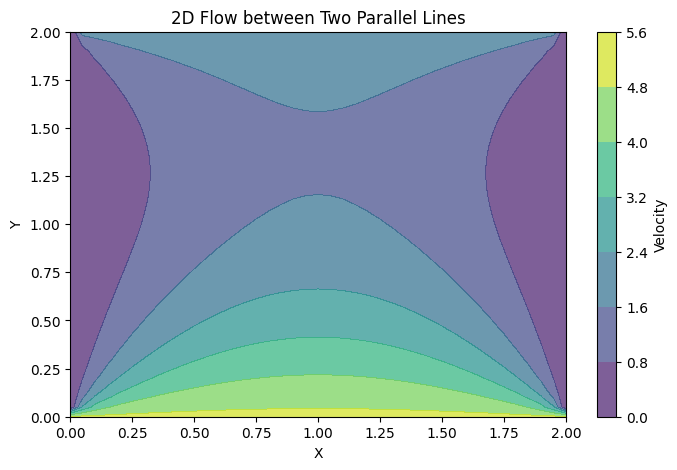

In [30]:
# Plotting the velocity field
plt.figure(figsize=(8, 5))
plt.contourf(np.linspace(0, 2, nx), np.linspace(0, 2, ny), U, alpha=0.7, cmap="viridis")
plt.colorbar(label='Velocity')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Flow between Two Parallel Lines')
plt.show()